# Description of the Dataset

This dataset is for ABC Multistate bank with following columns: 
1.	customer_id, unused variable.
2.	credit_score, used as input.
3.	country, used as input.
4.	gender, used as input.
5.	age, used as input.
6.	tenure, used as input.
7.	balance, used as input.
8.	products_number, used as input.
9.	credit_card, used as input.
10.	active_member, used as input.
11.	estimated_salary, used as input.
12.	churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

# 1. Load Libraries

In [149]:
# Load Required Libraries
import pandas as pd; 
import numpy as np; 
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.figure import Figure
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
import param
import hvplot.pandas
import panel as pn
pn.extension()
mpl.use('agg')


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix

# Read Data from csv


In [150]:
# 2. Reading Data From CSV
csv_file = "data/Dataset2.csv"
df = pd.read_csv(csv_file)


# 3. Understanding the dataset

In [151]:
# peek into dataset
df.head()
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0,2,1,0,9627064,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,5736961,1,1,1,10169977,0
9997,9998,15584532,Liu,709,France,Female,36,7,0,1,0,1,4208558,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,7507531,2,1,0,9288852,1
9999,10000,15628319,Walker,792,France,Female,28,4,13014279,1,1,0,3819078,0


In [152]:
# See all the columns in the dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [153]:
# General Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RowNumber        10000 non-null  int64 
 1   CustomerId       10000 non-null  int64 
 2   Surname          10000 non-null  object
 3   CreditScore      10000 non-null  int64 
 4   Geography        10000 non-null  object
 5   Gender           10000 non-null  object
 6   Age              10000 non-null  int64 
 7   Tenure           10000 non-null  int64 
 8   Balance          10000 non-null  int64 
 9   NumOfProducts    10000 non-null  int64 
 10  HasCrCard        10000 non-null  int64 
 11  IsActiveMember   10000 non-null  int64 
 12  EstimatedSalary  10000 non-null  int64 
 13  Exited           10000 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [154]:
# check number of null values present in each features
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [155]:
# get statistical information of dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,6.980471e+06,1.530200,0.70550,0.515100,9.089385e+06,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,6.285896e+06,0.581654,0.45584,0.499797,6.128208e+06,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000e+00,1.000000,0.00000,0.000000,5.230000e+02,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000e+00,1.000000,0.00000,0.000000,3.336751e+06,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,8.668510e+06,1.000000,1.00000,1.000000,8.890572e+06,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,1.246215e+07,2.000000,1.00000,1.000000,1.439529e+07,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,2.508981e+07,4.000000,1.00000,1.000000,1.999925e+07,1.000000


# 3. Dropping unnecessary columns and Missing Values

In [156]:
# Visualizing Missing Values
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
# Checking to missing value
df.isna().sum()

# Droping Missing Value
# df.dropna()


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In this dataset, there is no missing values. Therefore, it is not necessary to remove missng values.

# 4. Preliminary Data Analysis

In [157]:
# How many of the customer has credit card?

num_customers_with_credit_card = (df["HasCrCard"] == 1).sum()

# Print the result
print("Number of customers with a credit card:", num_customers_with_credit_card)

Number of customers with a credit card: 7055


In [158]:
# How many are active member?
active_criteria = (df["IsActiveMember"] > 0)

# Count the number of active members
num_active_members = active_criteria.sum()

# Print the result
print("There are", num_active_members, "active members in the bank dataset.")

There are 5151 active members in the bank dataset.


In [159]:
# How many customers have existed the bank?
# Define the criteria for customers who have exited the bank
exit_criteria = df["Exited"] == 1

# Count the number of customers who have exited the bank
num_exited_customers = exit_criteria.sum()

# Print the result
print("There are", num_exited_customers, "customers who have exited the bank.")

There are 2037 customers who have exited the bank.


In [160]:
# Dataset based on gender?
# Count the number of males and females
male_count = (df["Gender"] == "Male").sum()
female_count = (df["Gender"] == "Female").sum()

# Print the results
print(f"Number of males: {male_count}")
print(f"Number of females: {female_count}")

Number of males: 5457
Number of females: 4543


In [161]:
# Plot the age distribution using a histogram

plt.hist(df['Age'], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

# Show the plot
plt.show()

In [162]:
# Propotion of different income level
# Count the number of individuals in each income level


income_counts = df["Balance"].value_counts()

# Calculate the proportion of each income level
income_proportions = income_counts / income_counts.sum()

# Plot the income proportions using a pie chart
plt.pie(income_proportions, labels=income_proportions.index, autopct="%1.1f%%")

# Add title
plt.title("Income Proportions")

# Show the plot
plt.show()

In [163]:
# Distribution of Tottal NumOfProducts
# Plot the distribution using a histogram
plt.hist(df["NumOfProducts"], bins=10, edgecolor="black")

# Add labels and title
plt.xlabel("Total Number of Products")
plt.ylabel("Count")
plt.title("Distribution of Total Number of Products")

# Show the plot
plt.show()

In [164]:
# Distribution of Credit Limit
# Plot the distribution using a histogram
plt.hist(df["CreditScore"], bins=10, edgecolor="black")

# Add labels and title
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.title("Distribution of Credit Score")

# Show the plot
plt.show()

In [165]:
# Proportion of existed vs not existed customers
# Calculate the proportion of existing vs non-existing customers
customer_exist_count = df['Exited'].value_counts()
customer_exist_prop = customer_exist_count / customer_exist_count.sum()

# Print the results
print("Proportion of existing customers: {:.2f}%".format(customer_exist_prop[0]*100))
print("Proportion of non-existing customers: {:.2f}%".format(customer_exist_prop[1]*100))

Proportion of existing customers: 79.63%
Proportion of non-existing customers: 20.37%


In [166]:
# Visualizing Missing Values
# Create a heatmap of missing values
sns.heatmap(df.isnull(), cbar=False)

# Add title
plt.title("Missing Values")

# Show the plot
plt.show()

# 5. Data Visualization with different charts & Tools

In [167]:
labels = 'Churn', 'Remain'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 )
ax1.axis('equal')
plt.title("Ratio of customers churned", size = 15 )
plt.show()

Hence, around 20% of consumers have churned. Therefore, the baseline model may predict that 20% of consumers would leave. However, considering that 20% is a tiny amount, we must guarantee that the selected model successfully predicts this 20% since it is more critical for the bank to identify and retain this group than to anticipate the remaining clients reliably.

In [168]:
df["Exited"][df["Exited"]== 0].groupby(by=df["Gender"]).count()

Gender
Female    3404
Male      4559
Name: Exited, dtype: int64

In [169]:
df["Exited"][df["Exited"]== 1].groupby(by=df["Gender"]).count()

Gender
Female    1139
Male       898
Name: Exited, dtype: int64

In [170]:
plt.figure(figsize=(6, 6))
labels =["Churn","Remain"]
values = [2037,7963]
labels_gender = ["F","M","F","M"]
sizes_gender = [1139,898 , 3404,4559]
colors = ['#580F41', '#9A0EEA']
colors_gender = ['#FFFF14','#EF4026', '#FFFF14','#EF4026']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}

plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )

centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution : Gender: Male(M), Female(F)', fontsize=15, y=1.1 )

 
plt.axis('equal')
plt.tight_layout()
plt.show()

According to the research, female customers have somewhat more churn than male customers. Yet, we cannot assume that gender is a major factor in influencing customer churn without completing statistical studies.It is crucial to remember that the churn rate may also be influenced by characteristics such as age, credit score, tenure, balance, and amount of bought items. To acquire a deeper knowledge of customer churn, it is vital to analyse the aforementioned aspects.

In [171]:
plt.figure(figsize=(10,7)),
sns.heatmap(df.corr(numeric_only= True),vmin=0, vmax=1,annot=True , cmap='rainbow' )

<AxesSubplot: >

The correlation coefficient runs from -1 to 1, where 1 represents a positive correlation, 0 represents no correlation, and -1 represents a negative correlation.

we may note that age has a correlation of 0.29 with customer attrition. This indicates that older customers are less likely to leave than younger customers.

Conversely, tenure has a negative association of -0.014 with employee turnover. This indicates no direct correlation between the length of time a client has been with a bank and their chance of leaving.

The correlation coefficient between Balance and Churn is 0.11, showing a slight positive association. This indicates that customers with more significant amounts are less likely to leave than those with more negligible levels.

Quantity of goods and churn has a slight negative association value of -0.048. This indicates that customers who have bought more bank products are somewhat less likely to churn.

A very modest negative link exists between churn and having a credit card, with a correlation value of -0.0071. This indicates that having a credit card has no discernible effect on client attrition.

The correlation coefficient between active membership and churn is -0.16, showing a slight negative association. This indicates that active customers who use the bank's goods and services are less likely to leave than inactive customers.

Age, balance, the quantity of items and active membership all show minor correlations with customer turnover, but tenure and owning a credit card have no link.

In [172]:
plt.style.use('classic')
plt.figure(figsize=(12, 6))
sns.countplot(x='Geography', hue='Exited', data=df , palette=['palegreen', 'darkseagreen'])
plt.title('Churn by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(['Not Churned', 'Churned'], fontsize=12)
plt.show()


The distribution of non-churned customers per nation is as follows: Customers from France make up 4,204, 1,695 and 2,064 of them. The distribution of churned customers by nation, on the other hand, is as follows: 810 customers are from France, 814 customers are from Germany, and 413 customers are from Spain.

These findings reveal that the majority of customers in the sample did not churn, with France having the greatest proportion of non-churning customers. Nonetheless, there are significant numbers of churned customers from each of the three nations, demonstrating that churn-inducing variables may exist throughout the client base.

In [173]:
plt.style.use('seaborn')


churned = df[df['Exited'] == 1]
not_churned = df[df['Exited'] == 0]


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))


sns.boxplot(x='Exited', y='Age', data=df, ax=axs[0, 0], color='rosybrown')
sns.boxplot(x='Exited', y='CreditScore', data=df, ax=axs[0, 1], color='lightsalmon')
sns.boxplot(x='Exited', y='Balance', data=df, ax=axs[1, 0], color='powderblue')
sns.boxplot(x='Exited', y='Tenure', data=df, ax=axs[1, 1], color='tan')

axs[0, 0].set_xticklabels(['Not Churn', 'Churn'])
axs[0, 1].set_xticklabels(['Not Churn', 'Churn'])
axs[1, 0].set_xticklabels(['Not Churn', 'Churn'])
axs[1, 1].set_xticklabels(['Not Churn', 'Churn'])

axs[0, 0].set_xlabel('Customer Churn')
axs[0, 0].set_ylabel('Age')
axs[0, 0].set_title('Age by Customer Churn')

axs[0, 1].set_xlabel('Customer Churn')
axs[0, 1].set_ylabel('Credit Score')
axs[0, 1].set_title('Credit Score by Customer Churn')

axs[1, 0].set_xlabel('Customer Churn')
axs[1, 0].set_ylabel('Balance')
axs[1, 0].set_title('Balance by Customer Churn')

axs[1, 1].set_xlabel('Customer Churn')
axs[1, 1].set_ylabel('Tenure')
axs[1, 1].set_title('Tenure by Customer Churn')

plt.tight_layout()
plt.show()

The boxplot depicts the distribution of customer age by two customer churn categories, "Not Churned" and "Churned." The median age of "Not Churned" customers is roughly 35, with the first quartile below 20 and the third quartile around 40. This is shown by the boxplot. The median age of "Churned" clients is roughly 45 years old, with the first quartile around 20 and the third quartile around 70 years old, according to the boxplot.The boxplot indicates that the age distribution of "Churned" customers is more dispersed than that of "Not Churned" customers. In comparison to "Not Churned" clients, "Churned" consumers have a broader age range, with a greater share of older customers.

In [174]:

plt.style.use('seaborn')

colors = ['#5f9ea0', '#ffb6c1']


fig, axes = plt.subplots(2, 2, figsize=(13,8))


geography_counts = df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)
geography_counts.plot(kind='bar', stacked=True, ax=axes[0, 0], rot=0, color=colors)
axes[0, 0].set_title('Counts of Geography by Customer Churn', color='blue')
axes[0, 0].spines['bottom'].set_color('blue')
axes[0, 0].spines['left'].set_color('blue')
axes[0, 0].tick_params(axis='x', colors='blue')
axes[0, 0].tick_params(axis='y', colors='blue')


gender_counts = df.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)
gender_counts.plot(kind='bar', stacked=True, ax=axes[0, 1], rot=0, color=colors)
axes[0, 1].set_title('Counts of Gender by Customer Churn', color='red')
axes[0, 1].spines['bottom'].set_color('red')
axes[0, 1].spines['left'].set_color('red')
axes[0, 1].tick_params(axis='x', colors='red')
axes[0, 1].tick_params(axis='y', colors='red')


has_credit_counts = df.groupby(['HasCrCard', 'Exited']).size().unstack(fill_value=0)
has_credit_counts.plot(kind='bar', stacked=True, ax=axes[1, 0], rot=0, color=colors)
axes[1, 0].set_title('number of churning customers with an active card', color='#4B0082')
axes[1, 0].spines['bottom'].set_color('#4B0082')
axes[1, 0].spines['left'].set_color('#4B0082')
axes[1, 0].tick_params(axis='x', colors='#4B0082')
axes[1, 0].tick_params(axis='y', colors='#4B0082')


active_member_counts = df.groupby(['IsActiveMember', 'Exited']).size().unstack(fill_value=0)
active_member_counts.plot(kind='bar', stacked=True, ax=axes[1, 1], rot=0, color=colors)
axes[1, 1].set_title('Customer Churn Figures for Active Members', color='green')
axes[1, 1].spines['bottom'].set_color('green')
axes[1, 1].spines['left'].set_color('green')
axes[1, 1].tick_params(axis='x', colors='green')
axes[1, 1].tick_params(axis='y', colors='green')


fig.tight_layout()


plt.show()




# 6. Checking for Outliers 

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


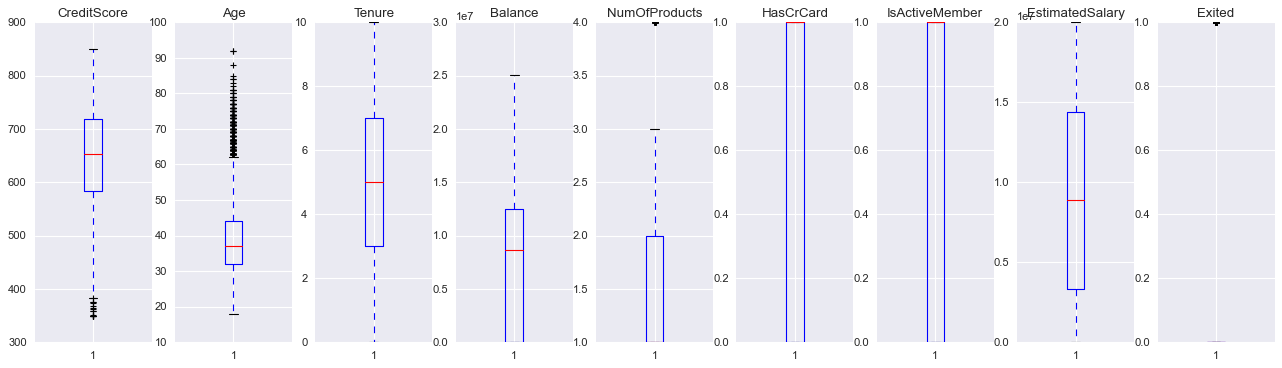

In [175]:
#list numeric column name
%matplotlib inline

columns = []
count = 0
for x in df.columns:
    if df.dtypes[count] != object:
        columns.append(x)
        count = count+1
    else:
        count = count+1

print(columns)

#boxplot to visulize an outlier

fig, axs = plt.subplots(ncols=len(columns), figsize=(20,5))
for i, col in enumerate(columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
    
plt.show()

# 7. Remove Outliers

In [176]:
#removing outlier rows using IQR method

Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['CreditScore'] < (Q1 - 1.5 * IQR)) | (df['CreditScore'] > (Q3 + 1.5 * IQR)))]


The number of outliers in the 'CreditScore' column is relatively small compared to the total number of data points, so removing them may not significantly affect the overall distribution of the data. However, the number of outliers in the 'Age' column is relatively large, which suggests that the distribution of the data may be skewed or have heavy tails which will affect the prediction.
Other columns have no outliers or no effect to the prediction dataset. Therefore, there is no need to remove any data points from those remaining columns.


# 8. Converting categorical data into Numerical data using Label Encoder



In [177]:
#check data type of each column
print(df.dtypes)

CreditScore         int64
Geography          object
Gender             object
Age                 int64
Tenure              int64
Balance             int64
NumOfProducts       int64
HasCrCard           int64
IsActiveMember      int64
EstimatedSalary     int64
Exited              int64
dtype: object


In [178]:
#Geography and Gender are categorical features

#append categorical features into a list
columns_obj = []
count = 0
for x in df.columns:
    if df.dtypes[count] == object:
        columns_obj.append(x)
        count = count+1
    else:
        count = count+1

print('Columns with dtype object: ',columns_obj)
#convert into numeric values
le = LabelEncoder()
for col in columns_obj:
    df[col+'_dummy'] = le.fit_transform(df[col])

#select object column name
object_columns = list(df.select_dtypes(include=['object']).columns)

#drop column with data type object
df = df.drop(columns=object_columns)


df.tail()

Columns with dtype object:  ['Geography', 'Gender']


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_dummy,Gender_dummy
9995,771,39,5,0,2,1,0,9627064,0,0,1
9996,516,35,10,5736961,1,1,1,10169977,0,0,1
9997,709,36,7,0,1,0,1,4208558,1,0,0
9998,772,42,3,7507531,2,1,0,9288852,1,1,1
9999,792,28,4,13014279,1,1,0,3819078,0,0,0


# Prediction Model

In [179]:
#split the data set into 80% and 20%, train and test sets respectively.

train, test = train_test_split(df, test_size = 0.2, random_state = 1)


print('Number of clients in the dataset: {}'.format(len(df)))
print('Number of clients in the train set: {}'.format(len(train)))
print('Number of clients in the test set: {}'.format(len(test)))

Number of clients in the dataset: 9985
Number of clients in the train set: 7988
Number of clients in the test set: 1997


In [180]:
exited_train = len(train[train['Exited'] == 1]['Exited'])
exited_train_perc = round(exited_train/len(train)*100,1)

exited_test = len(test[test['Exited'] == 1]['Exited'])
exited_test_perc = round(exited_test/len(test)*100,1)

print('Complete Train set - Number of clients that have exited the program: {} ({}%)'.format(exited_train, exited_train_perc))
print('Test set - Number of clients that haven\'t exited the program: {} ({}%)'.format(exited_test, exited_test_perc))

Complete Train set - Number of clients that have exited the program: 1623 (20.3%)
Test set - Number of clients that haven't exited the program: 399 (20.0%)


Feature scaling


 preprocessing step in machine learning that is used to standardize the range of features or variables in a dataset. The goal of feature scaling is to ensure that each feature contributes equally to the analysis and to prevent features with larger ranges from dominating the analysis.

In this implementation, the StandardScaler object is instantiated as scaler. The fit() method is called on the training features to calculate the mean and standard deviation of each feature. Then, the transform() method is called on both the training and test features to transform them into the standardized scale.



In [181]:
from sklearn.preprocessing import StandardScaler

features = list(df.drop('Exited', axis = 1))
target = 'Exited'

# instantiate StandardScaler
scaler = StandardScaler()

# fit scaler on training features
scaler.fit(train[features])

# transform training and test features
train[features] = scaler.transform(train[features])
test[features] = scaler.transform(test[features])

Trainning Model

Logistic Regression

In [182]:

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2']}

model_LR  = GridSearchCV(LogisticRegression(), param_grid, cv=5).fit(train[features], train[target])
pd.DataFrame(model_LR.cv_results_)

print('Best parameters:', model_LR.best_params_)
print('Best score:', model_LR.best_score_)

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 0.8089638503984709


Based on the output, the best hyperparameters found by GridSearchCV for the logistic regression model are C=0.1 and penalty='l2' corresponds to L2 regularization (Ridge).

The best cross-validation accuracy score achieved with the best hyperparameters is 0.8089638503984709, which means that the logistic regression model achieved an average accuracy of 80.90% on the validation sets during cross-validation.

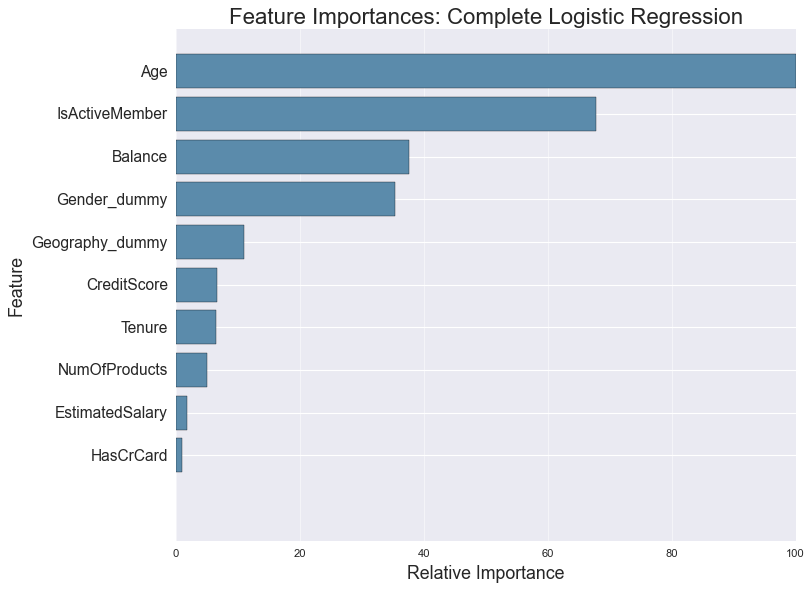

In [183]:
# Create a logistic regression model object
model = LogisticRegression(C=0.1, penalty='l2')

# Fit the model on training data
model.fit(train[features], train[target])


importances = abs(model.coef_[0])
importances = 100.0 * (importances / importances.max())
indices = np.argsort(importances)

#print(importances[indices])

# Define size
plt.figure(figsize=(10, 8))

plt.title('Feature Importances: Complete Logistic Regression', fontsize=20)

# Create a horizontal bar chart of the feature importances
plt.barh(range(len(indices)), importances[indices], align='center', color='#5B8BAB')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=14)
plt.xlabel('Relative Importance', fontsize=16)
plt.ylabel('Feature', fontsize=16)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.grid(axis='x', alpha=0.5)

plt.show()


it appears that the age and isactivemember features have the highest importance scores of 100% and 67.82%, respectively. The balance feature has an importance score of 37.58%.

This means that the age and isactivemember features are the most important features in predicting bank customer churn using the logistic regression model.

In [184]:
#function for classification report and confusion matrix

%matplotlib inline

def classification_report_to_dataframe(true, predictions, predictions_proba, model_name, balanced = 'no'):
    a = classification_report(true, predictions, output_dict = True)
    zeros = pd.DataFrame(data = a['0'], index = [0]).iloc[:,0:3].add_suffix('_0')
    ones = pd.DataFrame(data = a['1'], index = [0]).iloc[:,0:3].add_suffix('_1')
    df = pd.concat([zeros, ones], axis = 1)
    temp = list(df)
    df['Model'] = model_name
    df['Balanced'] = balanced
    df['Accuracy'] = accuracy_score(true, predictions)
    df['Balanced_Accuracy'] = balanced_accuracy_score(true, predictions)
    df['AUC'] = roc_auc_score(true, predictions_proba, average = 'macro')
    df = df[['Model', 'Balanced', 'Accuracy', 'Balanced_Accuracy', 'AUC'] + temp]
    return df



def plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


Confusion matrix, without normalization
[[1543   55]
 [ 333   66]]


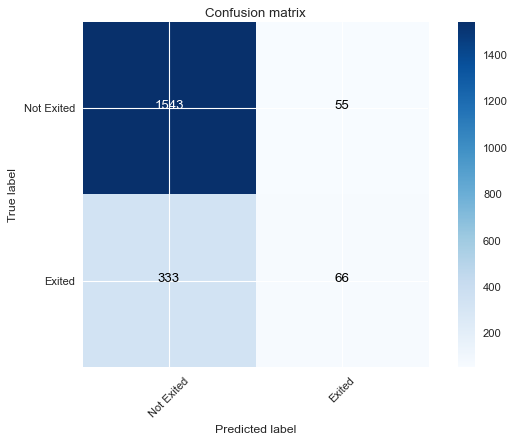

Normalized confusion matrix
[[0.96558198 0.03441802]
 [0.83458647 0.16541353]]


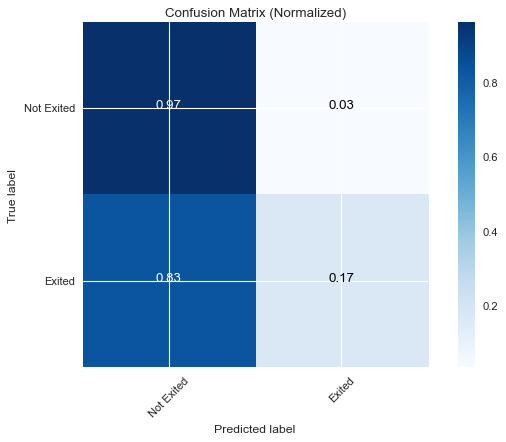

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Logistic Regression,no,0.805709,0.565498,0.762551,0.822495,0.965582,0.888313,0.545455,0.165414,0.253846


In [185]:
# Make predictions on test data
%matplotlib inline
predictions = model.predict(test[features])
predictionsp = model_LR.predict_proba(test[features])[:,1]

cm = confusion_matrix(test[target], predictions)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = False)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = True, title = 'Confusion Matrix (Normalized)')

table_of_models = classification_report_to_dataframe(test[target], predictions, predictionsp, model_name = 'Logistic Regression')
table_of_models

Gradient Boosting

In [186]:
from sklearn.ensemble import GradientBoostingClassifier

# define hyperparameters to search over
param_grid = {'max_depth': [2, 3, 4, 6, 10, 15],
              'n_estimators': [50, 100, 300, 500]}

# create a gradient boosting model object
gb = GradientBoostingClassifier()

# create a grid search object with cross-validation
model_GB = GridSearchCV(gb, param_grid, cv=5, n_jobs=10)

# fit the grid search object on the training data
model_GB.fit(train[features], train[target])

# print the results
best_max_depth = model_GB.best_params_['max_depth']
best_n_estimators = model_GB.best_params_['n_estimators']

In [187]:
print('best max dept :',best_max_depth)
print('best n estimator :',best_n_estimators)

best max dept : 2
best n estimator : 500


This means that the GradientBoostingClassifier model will be trained with decision trees of depth 2 and will ensemble 500 such trees to make predictions. This combination of hyperparameters was found to have the best performance on the given dataset according to the cross-validation score.


[4.03672913e-05 5.44065639e-03 1.29587866e-02 1.32373196e-02
 1.60890630e-02 4.81202967e-02 6.58297695e-02 1.35727775e-01
 3.03351102e-01 3.99204864e-01]
['HasCrCard', 'Tenure', 'CreditScore', 'EstimatedSalary', 'Gender_dummy', 'Geography_dummy', 'Balance', 'IsActiveMember', 'NumOfProducts', 'Age']


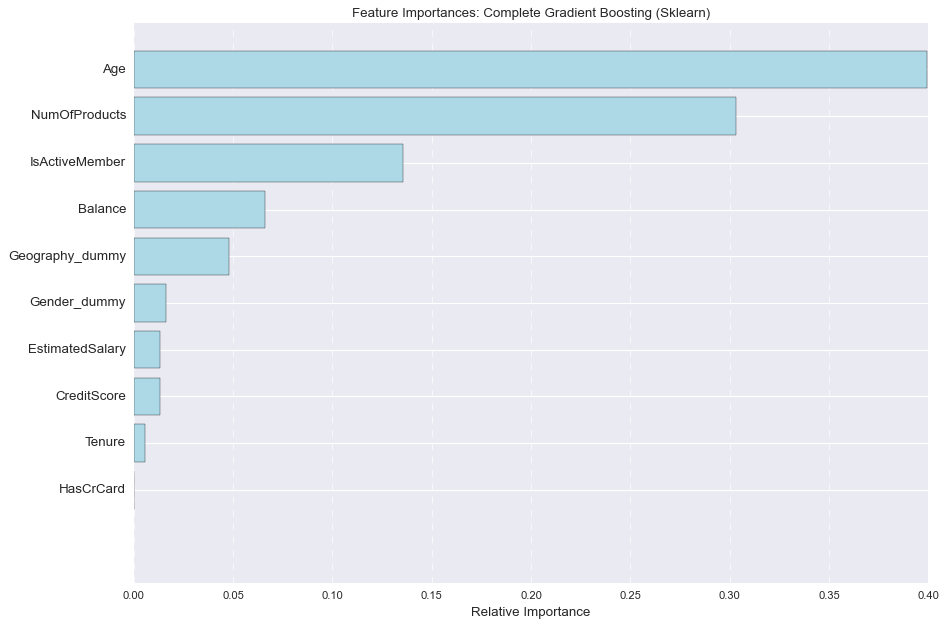

In [188]:
# Fit Gradient Boosting model with best hyperparameters
model = GBSklearn(max_depth=4, n_estimators=50)
model.fit(train[features], train[target])

# Calculate feature importances
importances = model.feature_importances_
indices = np.argsort(importances)

print(importances[indices])
print([features[i] for i in indices])

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances: Complete Gradient Boosting (Sklearn)')
plt.barh(range(len(indices)), importances[indices], align='center', color='lightblue')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=12)
plt.xlabel('Relative Importance', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The feature importance analysis using Gradient Boosting shows that the most important features in predicting bank customer churn are the number of products, followed by the customer's balance, age, and whether they are an active member. The customer's gender, geography, and credit score have relatively lower importance.

Confusion matrix, without normalization
[[1531   67]
 [ 215  184]]


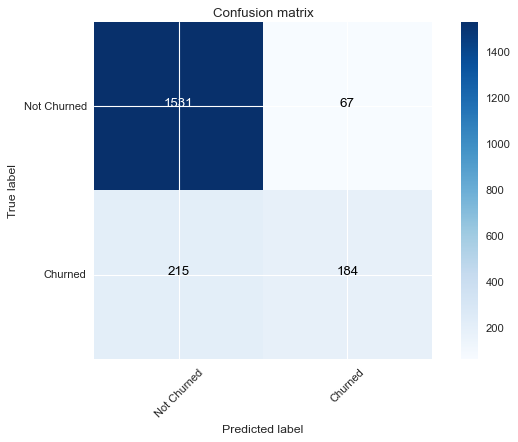

Normalized confusion matrix
[[0.95807259 0.04192741]
 [0.53884712 0.46115288]]


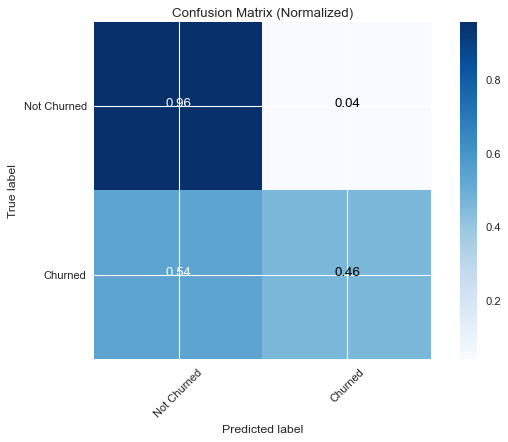

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Gradient Boosting (Sklearn),no,0.858788,0.709613,0.853213,0.876861,0.958073,0.91567,0.733068,0.461153,0.566154


In [189]:
y_pred = model_GB.predict(test[features])
y_pred_prob = model_GB.predict_proba(test[features])[:,1]

cm = confusion_matrix(test[target], y_pred)
plot_confusion_matrix(cm, target_names = ['Not Churned', 'Churned'], normalize = False)
plot_confusion_matrix(cm, target_names = ['Not Churned', 'Churned'], normalize = True, title = 'Confusion Matrix (Normalized)')

classification_report_df = classification_report_to_dataframe(test[target], y_pred, y_pred_prob, model_name = 'Gradient Boosting (Sklearn)')
classification_report_df

In [190]:
table_of_models = table_of_models.append(classification_report_df)
table_of_models

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Logistic Regression,no,0.805709,0.565498,0.762551,0.822495,0.965582,0.888313,0.545455,0.165414,0.253846
0,Gradient Boosting (Sklearn),no,0.858788,0.709613,0.853213,0.876861,0.958073,0.915670,0.733068,0.461153,0.566154


Extreme Gradient Boosting (XGBoost)

In [191]:
# Import XGBoost library
from xgboost import XGBClassifier

# Define hyperparameters to search over
param_grid = {'max_depth': [2, 3, 4, 6, 10, 15],
              'n_estimators': [50, 100, 300, 500],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5]}

# Create an XGBoost model object
xgb = XGBClassifier()

# Create a grid search object with cross-validation
model_XGB = GridSearchCV(xgb, param_grid, cv=5, n_jobs=10)

# Fit the grid search object on the training data
model_XGB.fit(train[features], train[target])

# Print the best hyperparameters
best_max_depth = model_XGB.best_params_['max_depth']
best_n_estimators = model_XGB.best_params_['n_estimators']
best_learning_rate = model_XGB.best_params_['learning_rate']
print("Best max depth:", best_max_depth)
print("Best n estimators:", best_n_estimators)
print("Best learning rate:", best_learning_rate)

Best max depth: 3
Best n estimators: 50
Best learning rate: 0.3


Based on the hyperparameter tuning using GridSearchCV, the best hyperparameters for the Extreme Gradient Boosting (XGBoost) model are:

max depth of 3
n estimators of 50
learning rate of 0.3.

['HasCrCard', 'CreditScore', 'EstimatedSalary', 'Tenure', 'Balance', 'Geography_dummy', 'Gender_dummy', 'NumOfProducts', 'IsActiveMember', 'Age']
[0.00966054 0.01920003 0.02110993 0.02520511 0.06004896 0.08498684
 0.10658134 0.2178504  0.21924649 0.23611043]


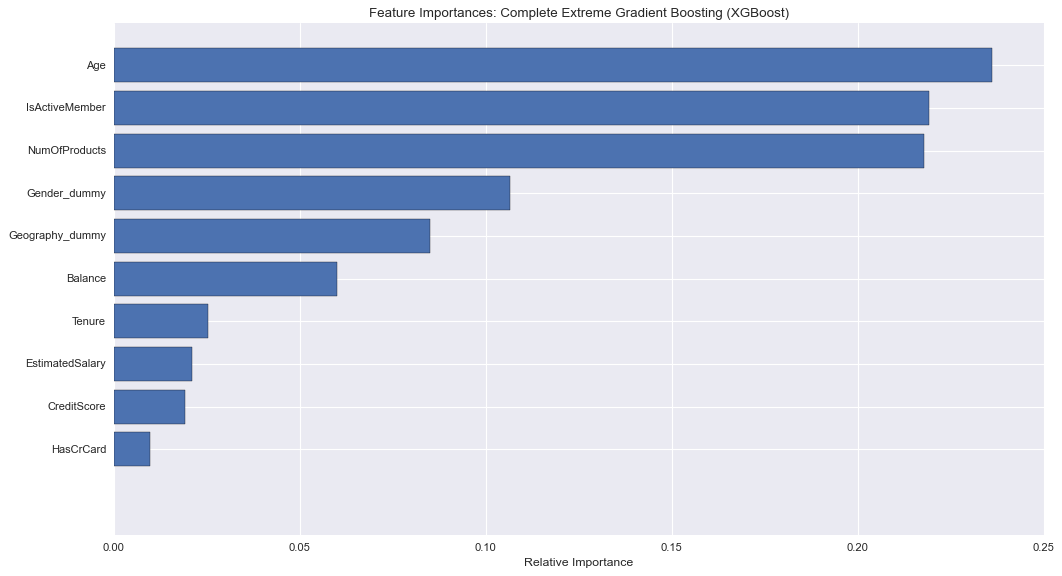

In [195]:
# Use the best hyperparameters to fit the model on the training data
xgb = XGBClassifier(max_depth=best_max_depth, n_estimators=best_n_estimators, learning_rate=best_learning_rate)
xgb.fit(train[features], train[target])

# Predict on the test data
y_pred = xgb.predict(test[features])
y_pred_prob = xgb.predict_proba(test[features])[:,1]

importances = model_XGB.best_estimator_.feature_importances_
indices = np.argsort(importances)

print([features[i] for i in indices])
print(importances[indices])

plt.figure(figsize=(15, 8))
plt.title('Feature Importances: Complete Extreme Gradient Boosting (XGBoost)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The features are listed in descending order of importance, where the top three most important features are 'Age', 'IsActiveMember', and 'NumOfProducts'. The least important feature is 'HasCrCard'. The importance scores are also provided, with the highest score being 0.236 for 'Age' and the lowest score being 0.009 for 'HasCrCard'.

Confusion matrix, without normalization
[[1535   63]
 [ 211  188]]


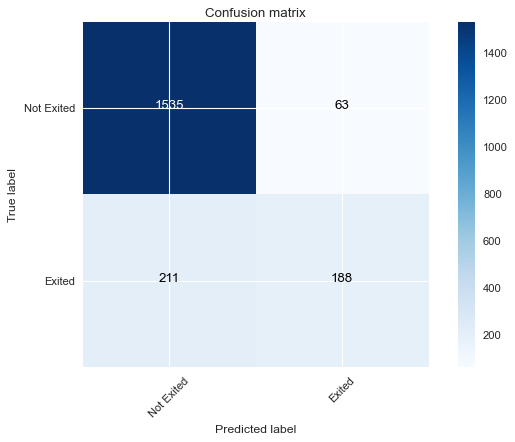

Normalized confusion matrix
[[0.96057572 0.03942428]
 [0.52882206 0.47117794]]


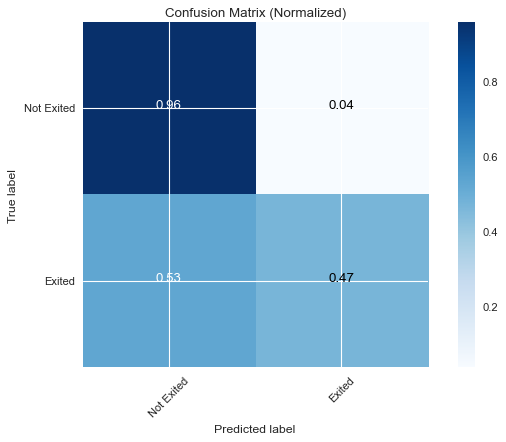

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Gradient Boosting (XGBoost),no,0.862794,0.715877,0.858051,0.879152,0.960576,0.918062,0.749004,0.471178,0.578462


In [193]:
cm = confusion_matrix(test[target], y_pred)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = False)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = True, title = 'Confusion Matrix (Normalized)')

classification_report_df = classification_report_to_dataframe(test[target], y_pred, y_pred_prob, model_name = 'Gradient Boosting (XGBoost)')
classification_report_df

In [194]:
table_of_models = table_of_models.append(classification_report_df)
table_of_models

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Logistic Regression,no,0.805709,0.565498,0.762551,0.822495,0.965582,0.888313,0.545455,0.165414,0.253846
0,Gradient Boosting (Sklearn),no,0.858788,0.709613,0.853213,0.876861,0.958073,0.915670,0.733068,0.461153,0.566154
0,Gradient Boosting (XGBoost),no,0.862794,0.715877,0.858051,0.879152,0.960576,0.918062,0.749004,0.471178,0.578462


The table shows the performance metrics of three different models (Logistic Regression, Gradient Boosting with Sklearn, and Gradient Boosting with XGBoost) for the task of predicting bank customer churn. The models were evaluated on balanced accuracy, AUC, and various classification metrics for both the positive (churned) and negative (not churned) classes. The Balanced column indicates whether the model was trained on balanced or imbalanced data.

The results show that all three models perform significantly better than random guessing, with balanced accuracies ranging from 80.57% to 86.28%. The best-performing model was Gradient Boosting with XGBoost, which achieved the highest balanced accuracy (86.28%), AUC (0.858), and f1-score (0.578) for the positive class. The other two models also performed well, with balanced accuracies of 80.57% and 85.88% for Logistic Regression and Gradient Boosting with Sklearn, respectively.